In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
np.random.seed(42)
N, d= 100000, 3
X = np.random.randn(N, d)
true_w = np.array([3, -2, 1])
true_b = 9
noise = np.random.randn(1)
y = X @ true_w + true_b + noise


In [18]:
def mse(y, y_pred):
  return np.mean((y - y_pred) ** 2)

In [19]:
def train_test_split(X, y, test_size=0.2):
  N = len(y)
  idx = np.arange(N)
  np.random.shuffle(idx)
  test_size = int(test_size * N)

  test_idx = idx[:test_size]
  train_idx = idx[test_size:]

  X_train, y_train = X[train_idx], y[train_idx]
  X_test, y_test = X[test_idx], y[test_idx]

  return X_train, y_train, X_test, y_test

In [28]:
def train_model(X, y, lr=0.01, epochs=500, lambda_=0.1):
  N, d = X.shape
  w = np.random.randn(d)
  b = np.random.randn()
  loss_history = []

  for epoch in range(epochs):
    y_pred = X @ w + b
    loss = mse(y, y_pred)
    loss_history.append(loss)

    dw = (2/N) * (X.T @ (y_pred - y)) + (2 * lambda_  * np.sum(w ** 2) )
    db = (2/N) * np.sum(y_pred - y)

    w -= lr * dw
    b -= lr * db

    # if epoch % 10 == 0:
    #   print(f"Epoch {epoch}: Loss = {loss:.4f}, w = {w}, b = {b:.4f}")

  return w, b, loss_history

In [29]:
def predict(X, w, b):
  return X @ w + b

In [30]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

Lambda = 0.0
  Learned w = [ 2.99986479 -1.99996097  0.99994807], b = 7.600
  True w = [ 3 -2  1], b = 9.000
  Test Loss = 0.0000
Lambda = 0.1
  Learned w = [ 1.5701427  -3.42008597 -0.42329312], b = 7.605
  True w = [ 3 -2  1], b = 9.000
  Test Loss = 6.0449


C:\Users\patil\AppData\Local\Temp\ipykernel_9908\2890706606.py:2: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
C:\Users\patil\AppData\Local\Temp\ipykernel_9908\3986037498.py:12: RuntimeWarning: overflow encountered in square
  dw = (2/N) * (X.T @ (y_pred - y)) + (2 * lambda_  * np.sum(w ** 2) )
C:\Users\patil\AppData\Local\Temp\ipykernel_9908\3986037498.py:8: RuntimeWarning: invalid value encountered in matmul
  y_pred = X @ w + b
C:\Users\patil\AppData\Roaming\Python\Python312\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Lambda = 1.0
  Learned w = [nan nan nan], b = nan
  True w = [ 3 -2  1], b = 9.000
  Test Loss = nan
Lambda = 10
  Learned w = [nan nan nan], b = nan
  True w = [ 3 -2  1], b = 9.000
  Test Loss = nan


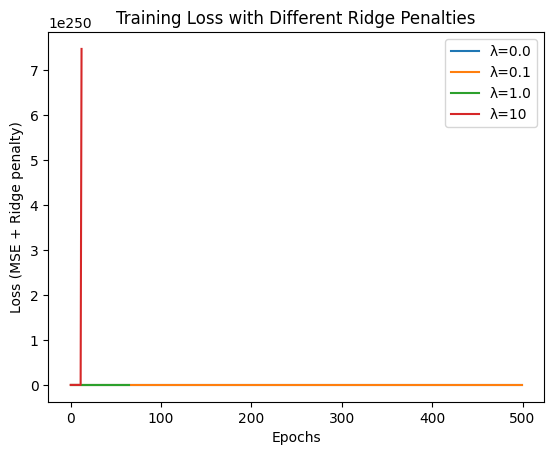

In [31]:
for l in [0.0, 0.1, 1.0, 10]:
  w, b, loss_history = train_model(X_train, y_train, lambda_=l)
  y_pred = predict(X_test, w, b)
  test_loss = mse(y_test, y_pred)
  print(f"Lambda = {l}")
  print(f"  Learned w = {w}, b = {b:.3f}")
  print(f"  True w = {true_w}, b = {true_b:.3f}")
  print(f"  Test Loss = {test_loss:.4f}")

  plt.plot(loss_history, label=f"λ={l}")


plt.xlabel("Epochs")
plt.ylabel("Loss (MSE + Ridge penalty)")
plt.title("Training Loss with Different Ridge Penalties")
plt.legend()
plt.show()